<a href="https://colab.research.google.com/github/Reagan-Reid-Git/Final-Machine-Learning-Project/blob/main/6_HAD7001_S25_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# run the line below if you don't have these packages installed
# you can comment out this line after installing
!pip install -q contractions nltk gensim
#the '-q' can be removed, it just supresses the outputs from these package installations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 4.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
!pip install -U numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 59.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.


In [3]:
# Import key packages for data processing and NLP

import pandas as pd  # Library for handling structured data (e.g., DataFrames) efficiently

# Import the necessary libraries for text preprocessing
import contractions  # Allows us to handle text contractions (e.g., "can't" -> "cannot")
import re  # Used for finding and replacing text patterns (e.g., removing special characters)
from datetime import datetime  # Provides functions for handling date and time operations

# Import NLTK (Natural Language Toolkit) for text tokenization
import nltk
from nltk.tokenize import word_tokenize  # Tokenizes text into individual words
nltk.download('punkt')  # Downloads the tokenizer model which we'll be using
nltk.download('punkt_tab')

# Import the 'stopwords' corpus from NLTK (Natural Language Toolkit)
from nltk.corpus import stopwords
nltk.download('stopwords')  # Downloads the predefined list of common stopwords from NLTK.

# WordCloud for visualizing the frequency of words in text data
from wordcloud import WordCloud
import matplotlib.pyplot as plt  # Library for plotting and visualization

# Libraries for lemmatization (reducing words to their base form)
from nltk.stem import WordNetLemmatizer  # Performs lemmatization
from nltk.corpus import wordnet  # Provides a lexical database for lemmatization
nltk.download('averaged_perceptron_tagger')  # Downloads the model for part-of-speech tagging
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')  # Downloads the WordNet lexical database


# package to handle warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [4]:
from google.colab import files
import io
uploaded = files.upload()

Saving WordCloud.csv to WordCloud.csv


In [6]:
# Read the dataset into a Pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['WordCloud.csv']), encoding='ISO-8859-1')

print(df.columns)

Index(['ï»¿Link', 'Title', 'Abstract', 'Discussion'], dtype='object')


In [7]:
print(df.columns)

# Select specific columns ('date', 'username', 'tweet', and 'Emotion') from the DataFrame
df = df[['Abstract', 'Title', 'Discussion']]

# Display the first few rows (head) of the DataFrame to inspect the data
df.head()

Index(['ï»¿Link', 'Title', 'Abstract', 'Discussion'], dtype='object')


,Abstract,Title,Discussion
0,Introduction\nObesity is a growing public heal...,Obesity Related Mortality in the Next Generati...,"In our study, the analysis of data from 1999 t..."
1,Objectives\nHospitalized patients with severe ...,Machine learning to predict inâhospital mort...,This research presents a machine learning tool...
2,Machine Learning is a powerful tool to discove...,Age-specific risk factors for the prediction o...,This study identifies risk factors for obesity...
3,It has been proposed that being overweight may...,Elevated All-Cause Mortality among Overweight ...,This is the first study to address the relatio...
4,Background: Obesity prevalence has become one ...,Does Physical Activity Predict ObesityâA Mac...,This study is the first study in the field to ...


In [8]:
import contractions
# Expand contractions in the 'tweet' column
df['Discussion_expanded'] = df['Discussion'].apply(lambda x: contractions.fix(x))
df.head()

,Abstract,Title,Discussion,Discussion_expanded
0,Introduction\nObesity is a growing public heal...,Obesity Related Mortality in the Next Generati...,"In our study, the analysis of data from 1999 t...","In our study, the analysis of data from 1999 t..."
1,Objectives\nHospitalized patients with severe ...,Machine learning to predict inâhospital mort...,This research presents a machine learning tool...,This research presents a machine learning tool...
2,Machine Learning is a powerful tool to discove...,Age-specific risk factors for the prediction o...,This study identifies risk factors for obesity...,This study identifies risk factors for obesity...
3,It has been proposed that being overweight may...,Elevated All-Cause Mortality among Overweight ...,This is the first study to address the relatio...,This is the first study to address the relatio...
4,Background: Obesity prevalence has become one ...,Does Physical Activity Predict ObesityâA Mac...,This study is the first study in the field to ...,This study is the first study in the field to ...


In [9]:
# Function to remove special characters and numbers
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

col= ['Abstract', 'Title', 'Discussion', 'Discussion_expanded']
# Applying the function to each cell of the columns individually using applymap
for column in col:
  df[column] = df[column].apply(lambda x: remove_special_characters(str(x)) if pd.notnull(x) else x)

#Converting all the values in the dataframe to lowercase.
df[col] = df[col].applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.head()

,Abstract,Title,Discussion,Discussion_expanded
0,introduction\nobesity is a growing public heal...,obesity related mortality in the next generati...,in our study the analysis of data from to re...,in our study the analysis of data from to re...
1,objectives\nhospitalized patients with severe ...,machine learning to predict inhospital mortali...,this research presents a machine learning tool...,this research presents a machine learning tool...
2,machine learning is a powerful tool to discove...,agespecific risk factors for the prediction of...,this study identifies risk factors for obesity...,this study identifies risk factors for obesity...
3,it has been proposed that being overweight may...,elevated allcause mortality among overweight o...,this is the first study to address the relatio...,this is the first study to address the relatio...
4,background obesity prevalence has become one o...,does physical activity predict obesitya machin...,this study is the first study in the field to ...,this study is the first study in the field to ...


In [10]:
def tokenize_text(text):
   return word_tokenize(text)

df['tokens'] = df['Discussion'].apply(tokenize_text)
df.head()

,Abstract,Title,Discussion,Discussion_expanded,tokens
0,introduction\nobesity is a growing public heal...,obesity related mortality in the next generati...,in our study the analysis of data from to re...,in our study the analysis of data from to re...,"[in, our, study, the, analysis, of, data, from..."
1,objectives\nhospitalized patients with severe ...,machine learning to predict inhospital mortali...,this research presents a machine learning tool...,this research presents a machine learning tool...,"[this, research, presents, a, machine, learnin..."
2,machine learning is a powerful tool to discove...,agespecific risk factors for the prediction of...,this study identifies risk factors for obesity...,this study identifies risk factors for obesity...,"[this, study, identifies, risk, factors, for, ..."
3,it has been proposed that being overweight may...,elevated allcause mortality among overweight o...,this is the first study to address the relatio...,this is the first study to address the relatio...,"[this, is, the, first, study, to, address, the..."
4,background obesity prevalence has become one o...,does physical activity predict obesitya machin...,this study is the first study in the field to ...,this study is the first study in the field to ...,"[this, study, is, the, first, study, in, the, ..."


In [11]:
# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df'.
df['tokens_no_stop'] = df['tokens'].apply(remove_stop_words)

# Display the first few rows of the DataFrame showing the 'tweet', 'tokens', and 'tokens_no_stop' columns.
# This gives a visual comparison between the original tokens and the tokens after stop words removal.
df[['Discussion', 'tokens', 'tokens_no_stop']].head()

,Discussion,tokens,tokens_no_stop
0,in our study the analysis of data from to re...,"[in, our, study, the, analysis, of, data, from...","[study, analysis, data, revealed, concerning, ..."
1,this research presents a machine learning tool...,"[this, research, presents, a, machine, learnin...","[research, presents, machine, learning, tool, ..."
2,this study identifies risk factors for obesity...,"[this, study, identifies, risk, factors, for, ...","[study, identifies, risk, factors, obesity, ad..."
3,this is the first study to address the relatio...,"[this, is, the, first, study, to, address, the...","[first, study, address, relationship, baseline..."
4,this study is the first study in the field to ...,"[this, study, is, the, first, study, in, the, ...","[study, first, study, field, assess, adulthood..."


In [16]:
# Define additional context-sensitive stop words
context_sensitive_stop_words = set(['obesity', 'overweight', 'study', 'analysis','first', 'research', 'factors', 'mortality','risk','may','model', 'high',
                                    'increase','et al','et', 'al','machine learning','feature','prediction','machine', 'learning','individual',
                                    'use','associated','hospitalzied', 'patients','amoung', 'result','results', 'system', 'future', 'limitation', 'algorithm', 'predicting',
                                    'individuals','predictive','limitations','value','predictive','although','among', 'data','rate','important','different'])

# English stop words
stop_words_set = set(stopwords.words('english')) # At the beginning of the tutorial, we downloaded a predefined set of common stopwords from NLTK /
# in this line, we're getting this predefined set of english stop words.

# Here we will remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    # Combine the general English stop words with the context-specific stop words /
    # to create a comprehensive set of words to filter out.
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in tokens if token.lower() not in all_stop_words]

# Apply the updated function to remove both general and context-sensitive stop words
df['tokens_no_stop_context'] = df['tokens'].apply(remove_context_sensitive_stop_words)

# Display the DataFrame
df[['Discussion', 'tokens', 'tokens_no_stop_context']].head()

,Discussion,tokens,tokens_no_stop_context
0,in our study the analysis of data from to re...,"[in, our, study, the, analysis, of, data, from...","[revealed, concerning, upward, trend, obesityr..."
1,this research presents a machine learning tool...,"[this, research, presents, a, machine, learnin...","[presents, tool, predict, inhospital, severe, ..."
2,this study identifies risk factors for obesity...,"[this, study, identifies, risk, factors, for, ...","[identifies, adults, extensive, dataset, provi..."
3,this is the first study to address the relatio...,"[this, is, the, first, study, to, address, the...","[address, relationship, baseline, bmi, near, o..."
4,this study is the first study in the field to ...,"[this, study, is, the, first, study, in, the, ...","[field, assess, adulthood, overweightobese, ri..."


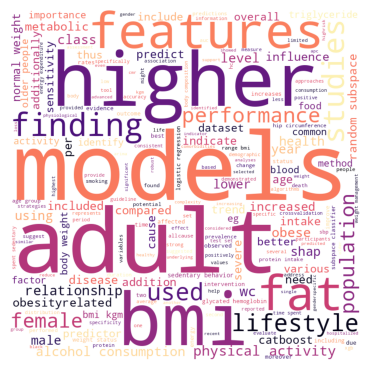

In [17]:
# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# You can remove .head(5000) if you want to generate the word cloud for the entire dataset
all_tokens = sum(df['tokens_no_stop_context'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [18]:
# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
df['lemmatized'] = df['tokens_no_stop_context'].apply(lemmatize_tokens_with_pos)

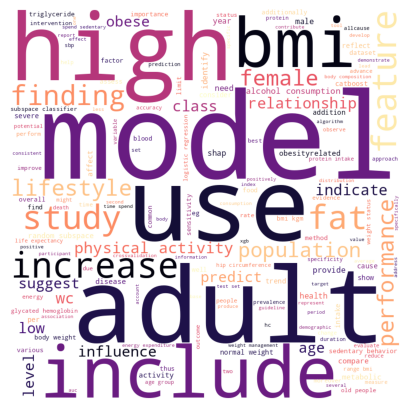

In [19]:
# Combine all tokens from the 'lemmatized' column into a single list
all_tokens = sum(df['lemmatized'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.9, 3.9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()